In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import datetime as dt

import plotly.graph_objects as go

pd.set_option('display.max_columns',None)

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

from flask import Flask, request, jsonify


from sklearn.model_selection import train_test_split #train our module
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib
import torch

In [181]:
#Förutom programmering,barmarksdarg och boxning har jag ett stort intresse för historia.
#Tragisk nutidshistoria skrivs och pågår just nu, endast 65mil(bortränat vatten mellan Sverige och Polen)
#från vår gräns.Dvs stäckan mellan Göteborg Hudiksvall.
#Krim annekterades av Ryssland 2014. Fullskaligt krig bröt ut 24 feb 2022.  
#Jag har valt att annalysera två csv filer russia_losses_equipment och russia_losses_personnel. 

#Jag fastnade på att försöka göra en model i DecisionTreeClassifier. Jag fick felkod för att alla värden inte var 
#numreriska. När jag lyckats att ändra(vilket visade sig vara fel) får jag bla isället detta felmeddelandet: can only concatenate str (not "numpy.float64") to str.
#Vilket betyder att det ej går att concatenera, sammanfoga str och float. Vilket jag räknat ut för längesedan. Men min begränsade kunskap kunde inte hitta lösningen just då. 
#Mitt csv innehåller många olika string, namn på städer mm. Skulle valt andra filer. 
#Jag försöker mig på att analysera  på andra sätt, tex inte använda algoritmer på så sätt att analyserar alla columner samtidigt.
#Det känns självklart så här i efter hand. Jag har en förmåga att försvåra saker.Det är dock tur att jag kan komma till insikt även om det tar tid.
#Jag hade önskat att jag skulle önskat mer innehåll i denna uppgift. Tiden räckte inte till denna gång.  
#Jag har bla inspererats av lektioner, kaggel och sparkbyexamples.com.  

#POW - Prisoner Of War,MRL - Multiple Rocket Launcher, APC - Armored Personnel Carrier, SRBM - Short Range Ballistic Missile

In [182]:
df_equipment = pd.read_csv('russia_losses_equipment.csv')
df_personnel = pd.read_csv('russia_losses_personnel.csv')

In [183]:
print(df_equipment.shape)

(395, 18)


In [184]:
print(df_personnel.shape)

(395, 5)


In [185]:
df_equipment.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN


In [186]:
df_personnel.head()

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0.0
1,2022-02-26,3,4300,about,0.0
2,2022-02-27,4,4500,about,0.0
3,2022-02-28,5,5300,about,0.0
4,2022-03-01,6,5710,about,200.0


In [187]:
df_equipment.describe()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,65.000000,65.000000,395.000000,395.000000,395.000000,376.000000,36.000000,330.000000,330.000000
mean,199.000000,232.921519,211.967089,2098.126582,4457.972152,1294.458228,301.726582,1047.507692,69.323077,1045.091139,13.840506,151.805063,121.255319,3.944444,3797.500000,413.993939
std,114.170924,64.794571,61.818396,967.923865,1705.429199,743.553903,131.007173,466.162060,7.545917,682.146583,4.208691,69.647736,70.660833,0.333333,1075.694026,284.487712
min,2.000000,10.000000,7.000000,80.000000,516.000000,49.000000,4.000000,100.000000,60.000000,0.000000,2.000000,0.000000,10.000000,2.000000,1796.000000,84.000000
25%,100.500000,210.000000,175.000000,1371.500000,3372.500000,677.500000,207.000000,600.000000,60.000000,537.500000,13.000000,95.000000,55.000000,4.000000,2807.250000,167.000000
50%,199.000000,239.000000,212.000000,2136.000000,4584.000000,1259.000000,311.000000,1178.000000,73.000000,898.000000,15.000000,162.000000,125.000000,4.000000,3931.000000,315.500000
75%,297.500000,281.000000,264.000000,2986.000000,5960.500000,1947.500000,410.000000,1437.000000,76.000000,1648.500000,16.000000,211.000000,178.000000,4.000000,4732.500000,723.000000
max,396.000000,305.000000,291.000000,3595.000000,6947.000000,2631.000000,522.000000,1701.000000,76.000000,2216.000000,18.000000,277.000000,282.000000,4.000000,5486.000000,911.000000


In [188]:
df_equipment.date = pd.to_datetime(df_equipment.date)
df_equipment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       395 non-null    datetime64[ns]
 1   day                        395 non-null    int64         
 2   aircraft                   395 non-null    int64         
 3   helicopter                 395 non-null    int64         
 4   tank                       395 non-null    int64         
 5   APC                        395 non-null    int64         
 6   field artillery            395 non-null    int64         
 7   MRL                        395 non-null    int64         
 8   military auto              65 non-null     float64       
 9   fuel tank                  65 non-null     float64       
 10  drone                      395 non-null    int64         
 11  naval ship                 395 non-null    int64         
 12  anti-air

In [189]:
corr_df=df_equipment.corr()
df_equipment.describe()

C:\Users\stahl\AppData\Local\Temp\ipykernel_3232\1896018335.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,65.000000,65.000000,395.000000,395.000000,395.000000,376.000000,36.000000,330.000000,330.000000
mean,199.000000,232.921519,211.967089,2098.126582,4457.972152,1294.458228,301.726582,1047.507692,69.323077,1045.091139,13.840506,151.805063,121.255319,3.944444,3797.500000,413.993939
std,114.170924,64.794571,61.818396,967.923865,1705.429199,743.553903,131.007173,466.162060,7.545917,682.146583,4.208691,69.647736,70.660833,0.333333,1075.694026,284.487712
min,2.000000,10.000000,7.000000,80.000000,516.000000,49.000000,4.000000,100.000000,60.000000,0.000000,2.000000,0.000000,10.000000,2.000000,1796.000000,84.000000
25%,100.500000,210.000000,175.000000,1371.500000,3372.500000,677.500000,207.000000,600.000000,60.000000,537.500000,13.000000,95.000000,55.000000,4.000000,2807.250000,167.000000
50%,199.000000,239.000000,212.000000,2136.000000,4584.000000,1259.000000,311.000000,1178.000000,73.000000,898.000000,15.000000,162.000000,125.000000,4.000000,3931.000000,315.500000
75%,297.500000,281.000000,264.000000,2986.000000,5960.500000,1947.500000,410.000000,1437.000000,76.000000,1648.500000,16.000000,211.000000,178.000000,4.000000,4732.500000,723.000000
max,396.000000,305.000000,291.000000,3595.000000,6947.000000,2631.000000,522.000000,1701.000000,76.000000,2216.000000,18.000000,277.000000,282.000000,4.000000,5486.000000,911.000000


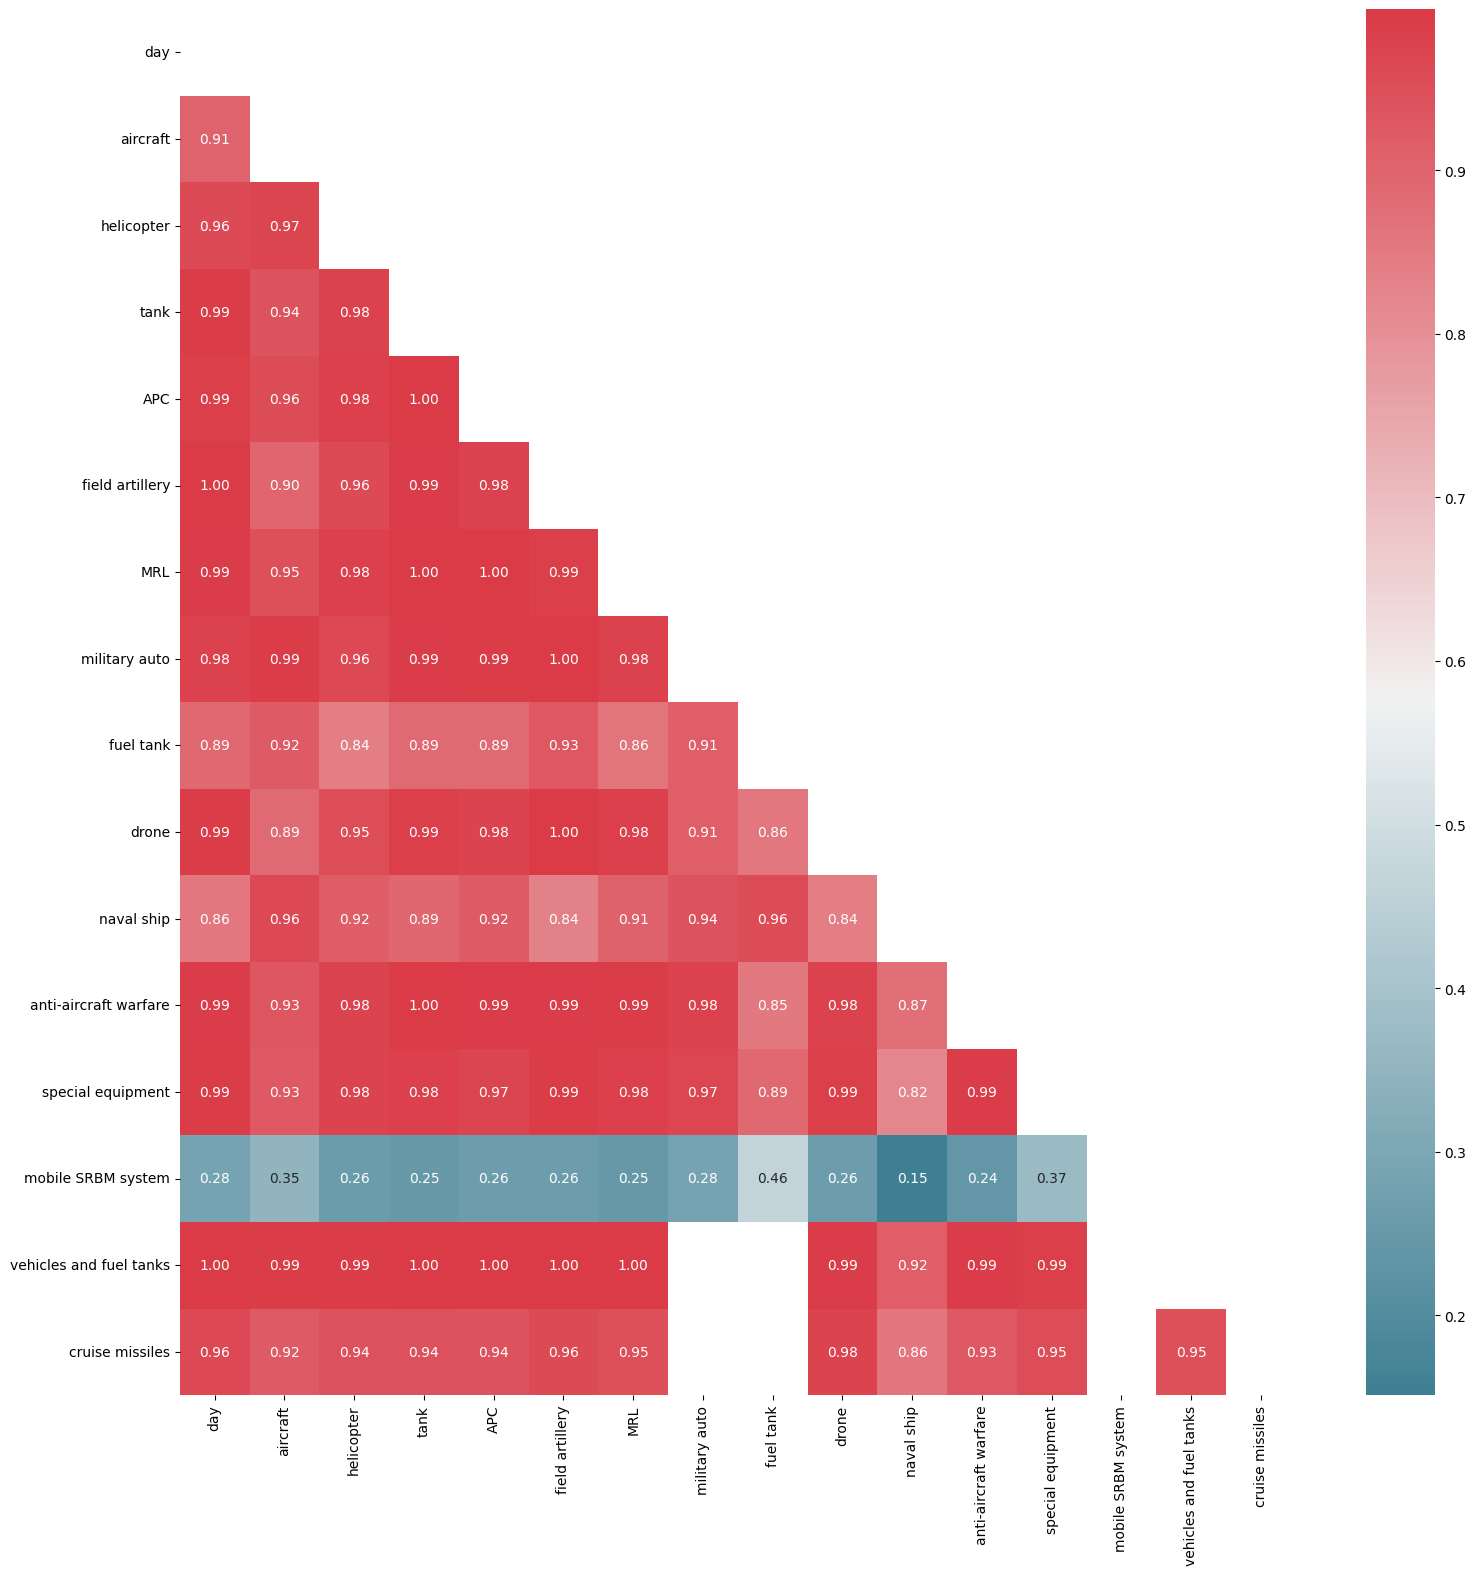

In [200]:

def print_corr_heatmap(corr_df):
    corr_list = corr_df.day.abs().sort_values(ascending=False).index[0:] #sorterar värden

    plt.figure(figsize=(18,18))
    drop_self = np.zeros_like(corr_df)
    drop_self[np.triu_indices_from(drop_self)] = True

    sns.heatmap(corr_df, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=drop_self)
    
print_corr_heatmap(corr_df)

In [191]:
df_equipment = df_equipment[['aircraft', 'helicopter']].max()
fig = px.pie(names = df_equipment.index,
             values =df_equipment.values,
             title = 'Aircraft and helicopter losses')
fig.update_traces(textposition='inside', textinfo='value+percent+label')
fig.show()

In [192]:
df_personnel.describe()

,day,personnel,POW
count,395.000000,395.000000,62.000000
mean,199.000000,66318.787342,386.387097
std,114.170924,44805.050966,131.440363
min,2.000000,2800.000000,0.000000
25%,100.500000,31000.000000,389.000000
50%,199.000000,52250.000000,421.000000
75%,297.500000,97985.000000,474.500000
max,396.000000,170550.000000,496.000000


In [193]:
#ändrar datum (object)till datime
df_personnel.date = pd.to_datetime(df_personnel.date)
df_personnel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        395 non-null    datetime64[ns]
 1   day         395 non-null    int64         
 2   personnel   395 non-null    int64         
 3   personnel*  395 non-null    object        
 4   POW         62 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 15.6+ KB


In [194]:
#Man ser här den skrämmande stora antalet avlinda,resterande är POW. 
df_personnel = df_personnel[['personnel', 'POW']].max()
fig = px.pie(names = df_personnel.index,
             values =df_personnel.values,
             title = 'Person and POW losses')
fig.update_traces(textposition='inside', textinfo='value+percent+label')
fig.show()

In [195]:
data_losses_equipment_path ='russia_losses_equipment.csv'
data_losses_personnel_path='russia_losses_personnel.csv'

In [196]:
#sätter till datetime och ändrar (astypes)till int. Tail 10 = 10sista raderna i csv-filen. 
df_losses_equipment = pd.read_csv(data_losses_equipment_path)
df_losses_equipment['date'] = pd.to_datetime(df_losses_equipment['date'])
df_losses_equipment = df_losses_equipment.set_index(['date', 'day', 'greatest losses direction'])

df_losses_equipment = df_losses_equipment.diff().fillna(df_losses_equipment).fillna(0).reset_index()
df_losses_equipment.tail(10)

,date,day,greatest losses direction,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles
385,2023-03-17,387,NaN,0.0,1.0,2.0,13.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,0.0
386,2023-03-18,388,NaN,0.0,0.0,5.0,7.0,8.0,2.0,0.0,0.0,14.0,0.0,0.0,1.0,0.0,3.0,0.0
387,2023-03-19,389,NaN,0.0,0.0,21.0,23.0,8.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,4.0,0.0
388,2023-03-20,390,NaN,0.0,0.0,5.0,16.0,9.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,0.0,8.0,0.0
389,2023-03-21,391,NaN,0.0,0.0,15.0,10.0,9.0,0.0,0.0,0.0,7.0,0.0,0.0,1.0,0.0,12.0,0.0
390,2023-03-22,392,NaN,0.0,0.0,5.0,8.0,3.0,2.0,0.0,0.0,16.0,0.0,2.0,4.0,0.0,6.0,2.0
391,2023-03-23,393,NaN,0.0,0.0,13.0,11.0,19.0,2.0,0.0,0.0,20.0,0.0,1.0,3.0,0.0,18.0,0.0
392,2023-03-24,394,NaN,0.0,0.0,4.0,23.0,8.0,0.0,0.0,0.0,5.0,0.0,3.0,4.0,0.0,12.0,2.0
393,2023-03-25,395,NaN,0.0,1.0,6.0,11.0,7.0,9.0,0.0,0.0,6.0,0.0,0.0,2.0,0.0,19.0,0.0
394,2023-03-26,396,NaN,0.0,0.0,15.0,15.0,8.0,2.0,0.0,0.0,2.0,0.0,1.0,3.0,0.0,3.0,0.0


In [197]:
df_losses_equipment.isna().sum()/df_losses_equipment.shape[0]



date                         0.000000
day                          0.000000
greatest losses direction    0.486076
aircraft                     0.000000
helicopter                   0.000000
tank                         0.000000
APC                          0.000000
field artillery              0.000000
MRL                          0.000000
military auto                0.000000
fuel tank                    0.000000
drone                        0.000000
naval ship                   0.000000
anti-aircraft warfare        0.000000
special equipment            0.000000
mobile SRBM system           0.000000
vehicles and fuel tanks      0.000000
cruise missiles              0.000000
dtype: float64

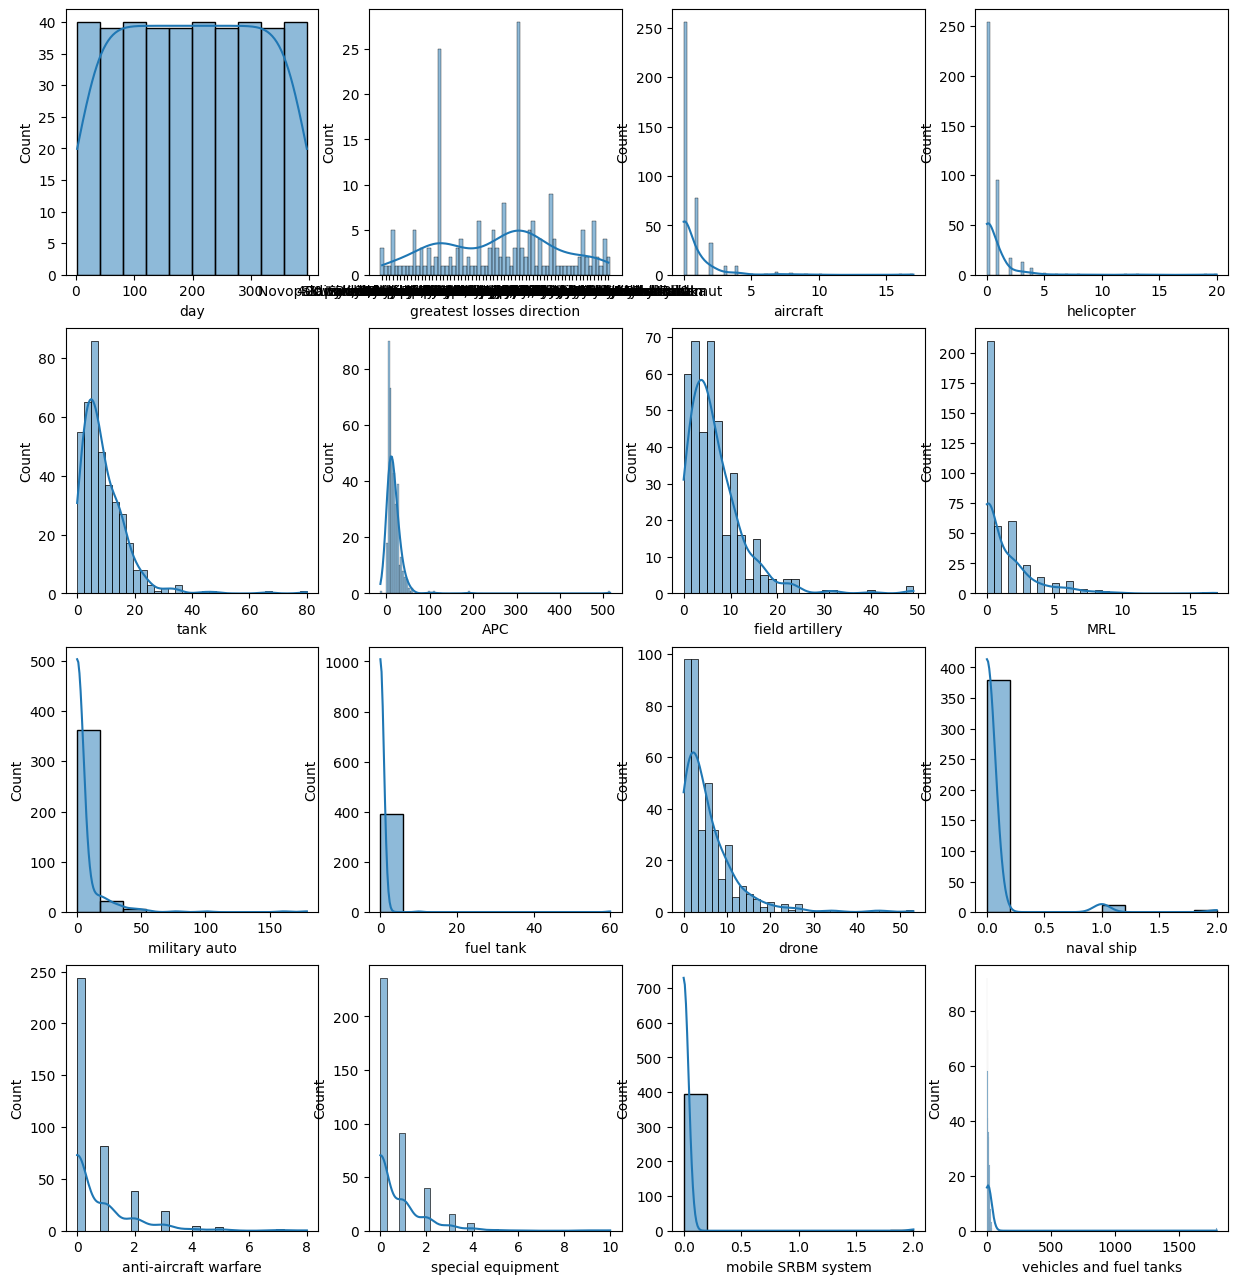

In [198]:
from scipy.stats import norm

plt.figure(figsize=(15, 20))

for i in range(1, len(df_losses_equipment.columns) - 1):
    plt.subplot(5, 4, i)
    sns.histplot(df_losses_equipment[df_losses_equipment.columns[i]], kde=True)

In [ ]:


x = df_equipment.drop("date", axis=1)
y = df_equipment["date"]

In [201]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)



NameError: name 'x' is not defined

In [202]:
app = Flask(__name__)

@app.route("/ukraine", methods = ["POST"])
def send_data(): 
    json_ = request.json 
    query_df = pd.DataFrame(json_)
    prediction = model.predict(query_df)
    return jsonify({"Prediction": prediction.tolist()})

if __name__ == "__main__":
    app.run(debug=False)



 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
